In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
%run f2forecast.py

In [3]:
df=pd.read_excel("DAT.xlsx")
df.head()

,t,Потребл.эн,Ставка
0,1,13.176,1526.41
1,2,15.408,1529.32
2,3,19.488,1528.81
3,4,19.176,1535.78
4,5,19.176,1540.92


In [4]:
#NewCons = []
#NewStav = []
#flag = 0
#for i in range(len(df["Ставка"])):
    #if (i==flag):
       # NewCons.append(df['Потребл.эн'][i])
        #NewStav.append(df['Ставка'][i])
        #flag += 2
#print(len(NewCons))

In [5]:
ConsWith = []
Stav = []
for i in range(len(df["Ставка"])):
    ConsWith.append(df['Потребл.эн'][i])
    Stav.append(df['Ставка'][i])
#Cons without holiyday
FirstWeek = ConsWith[0:47];
SecondWeek = ConsWith[95:215];
ThirdWeek = ConsWith[263:383];
FourWeek = ConsWith[431:551];
LastWeek = ConsWith[599:719];
Cons = FirstWeek + SecondWeek + ThirdWeek + FourWeek + LastWeek;
print(Cons)

[13.176, 15.408, 19.488, 19.176, 19.176, 19.968, 20.64, 22.128, 26.328, 21.84, 21.408, 22.248, 23.184, 24.816, 25.536, 28.536, 28.584, 29.88, 22.2, 19.248, 15.264, 14.4, 14.112, 14.4, 13.776, 14.16, 16.104, 18.768, 21.0, 18.648, 19.224, 18.024, 22.944, 23.088, 20.808, 19.032, 19.056, 19.704, 21.888, 22.224, 25.608, 24.72, 22.176, 18.48, 15.912, 15.384, 14.712, 13.224, 13.344, 14.232, 18.312, 18.048, 19.248, 21.072, 21.552, 21.408, 19.728, 17.712, 20.856, 22.128, 27.768, 28.176, 32.76, 33.312, 36.024, 32.4, 29.64, 25.68, 20.592, 18.288, 16.872, 15.912, 16.656, 17.424, 23.184, 21.288, 20.208, 20.16, 17.952, 18.216, 20.304, 20.544, 19.488, 19.992, 19.8, 24.072, 27.72, 30.456, 30.672, 32.544, 27.192, 21.672, 17.784, 15.936, 14.856, 15.48, 14.76, 16.68, 21.432, 17.472, 19.32, 18.12, 21.696, 22.152, 19.44, 18.984, 16.776, 21.12, 18.768, 18.288, 19.104, 26.4, 29.16, 29.28, 22.704, 17.904, 15.888, 14.064, 13.632, 13.032, 13.32, 13.536, 17.208, 18.816, 16.608, 16.08, 17.784, 18.408, 20.64, 19.4

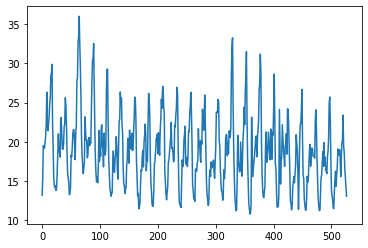

In [6]:
plt.plot(Cons)

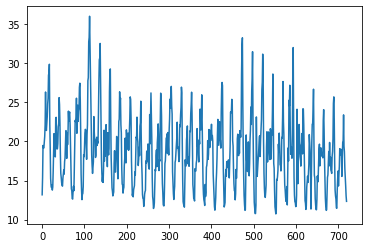

In [7]:
plt.plot(ConsWith)

In [8]:
df['Потребл.эн'].describe()

count    720.000000
mean      18.694600
std        4.498866
min       10.728000
25%       15.480000
50%       18.372000
75%       21.300000
max       36.024000
Name: Потребл.эн, dtype: float64

In [9]:
df['Ставка'].describe()

count     720.000000
mean     1591.331639
std        59.613754
min      1465.100000
25%      1541.742500
50%      1594.680000
75%      1635.797500
max      1702.300000
Name: Ставка, dtype: float64

Text(0.5, 0.98, 'Мультипликативная модель')

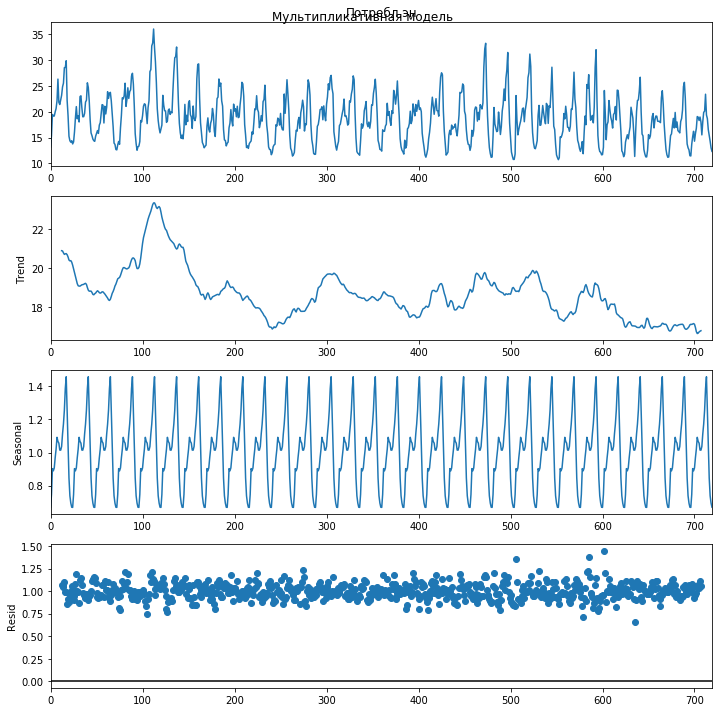

In [10]:
# декомпозиция 
result_M = seasonal_decompose(df['Потребл.эн'], model='multiplicative', freq=24)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультипликативная модель')

In [11]:
result_M.seasonal

0      0.668828
1      0.746721
2      0.902960
3      0.889624
4      0.907202
         ...   
715    1.029766
716    0.846447
717    0.738724
718    0.694609
719    0.669943
Name: seasonal, Length: 720, dtype: float64

In [12]:
result_M.trend

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
715   NaN
716   NaN
717   NaN
718   NaN
719   NaN
Name: trend, Length: 720, dtype: float64

Text(0.5, 0.98, 'Адитивная модель')

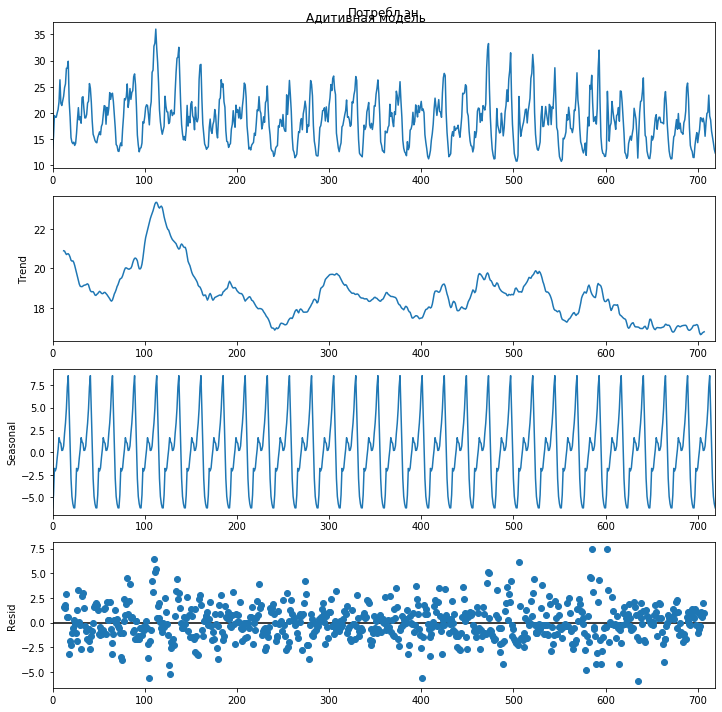

In [13]:
# Decompose 
result_A = seasonal_decompose(df['Потребл.эн'], model='additive', freq=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')

In [14]:
result_A.seasonal

0     -6.183073
1     -4.741832
2     -1.775142
3     -2.053866
4     -1.722987
         ...   
715    0.552065
716   -2.905556
717   -4.899659
718   -5.723797
719   -6.171728
Name: seasonal, Length: 720, dtype: float64

In [15]:
result_A.trend

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
715   NaN
716   NaN
717   NaN
718   NaN
719   NaN
Name: trend, Length: 720, dtype: float64

In [16]:
import pyEX as pticker 

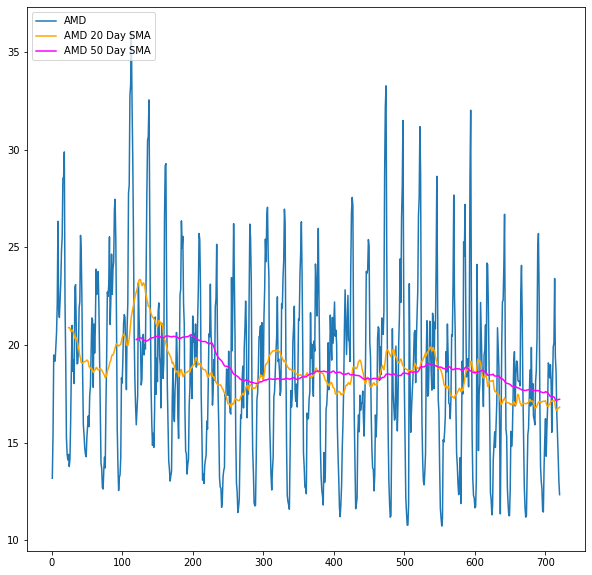

In [17]:
#https://www.machinelearningmastery.ru/implementing-moving-averages-in-python-1ad28e636f9d/
df.columns=['ds','y','z']
rolling_mean = df.y.rolling(window=24).mean()
rolling_mean2 = df.y.rolling(window=120).mean()
plt.plot(df.ds, df.y, label='AMD')
plt.plot(df.ds, rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(df.ds, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 0.98, 'Адитивная модель')

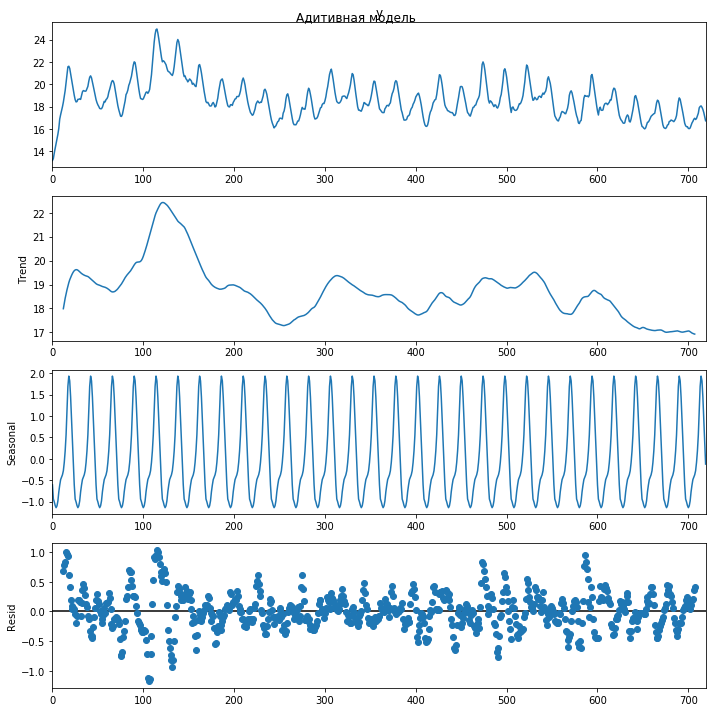

In [18]:
exp1 = df.y.ewm(span=24, adjust=False).mean()
exp2 = df.y.ewm(span=120, adjust=False).mean()
#plt.plot(df.ds, df.y, label='AMD')
#plt.plot(df.ds, exp1, label='AMD 20 Day EMA')
#plt.plot(df.ds, exp2, label='AMD 50 Day EMA')
#plt.legend(loc='upper left')
#plt.show()

# Decompose 
result_A = seasonal_decompose(exp1, model='additive', freq=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')

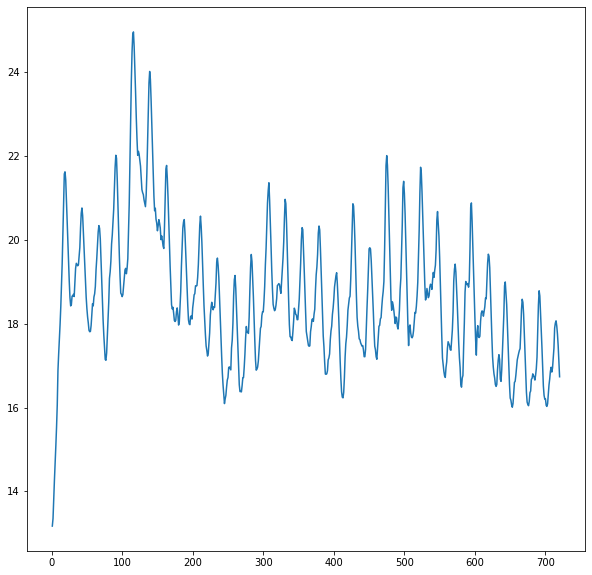

In [24]:
train=df.y
train.head()
plt.plot(df.ds, exp1)

In [20]:
test=df.y
test.head()

0    13.176
1    15.408
2    19.488
3    19.176
4    19.176
Name: y, dtype: float64

In [21]:
fit1 = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add').fit(use_boxcox=True)

In [22]:
fit1.params

{'smoothing_level': 0.6077478591434772,
 'smoothing_slope': 2.356109235558747e-10,
 'smoothing_seasonal': 1.0454034320359021e-09,
 'damping_slope': nan,
 'initial_level': 2.665004822299419,
 'initial_slope': 5.664577155043408e-11,
 'initial_seasons': array([0.12835888, 0.25466542, 0.46894491, 0.45564118, 0.48041201,
        0.555644  , 0.61380122, 0.69144992, 0.67253332, 0.65209841,
        0.607083  , 0.60627517, 0.62962858, 0.71430857, 0.77715353,
        0.85707029, 0.97722034, 1.0260297 , 0.84935113, 0.62302535,
        0.40031328, 0.24591429, 0.17353609, 0.13139112]),
 'use_boxcox': True,
 'lamda': 0.053373374363524476,
 'remove_bias': False}

In [23]:
fit1.fittedvalues

0      13.514445
1      14.850548
2      18.262506
3      18.783464
4      19.427793
         ...    
715    15.200778
716    13.190424
717    12.712757
718    12.823897
719    12.482139
Length: 720, dtype: float64

In [24]:
fit1.forecast(168)

720    12.360316
721    13.799196
722    16.609261
723    16.420098
724    16.773963
         ...    
883    18.955888
884    15.655057
885    13.694600
886    12.857828
887    12.393129
Length: 168, dtype: float64

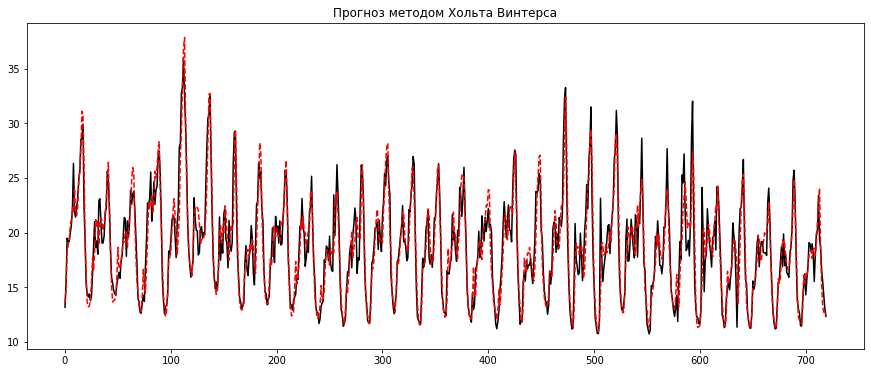

In [25]:
ax = df.y.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
#fit1.forecast(168).plot(ax=ax, style='--', color='green')
plt.show()

In [76]:
metrics(train, fit1.fittedvalues)

Тест на стационарность:
	T-статистика = -15.799
	P-значение = 0.000
Критические значения :
	1%: -3.4395677423210493 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.8656078730509784 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.5689362152032573 - Данные  стационарны с вероятностью 90% процентов
MAD: 1.3451
MSE: 3.2496
MAPE: 0.0706
MPE: -0.0045
Стандартная ошибка: 1.8027


Text(0.5, 0.98, 'Адитивная модель')

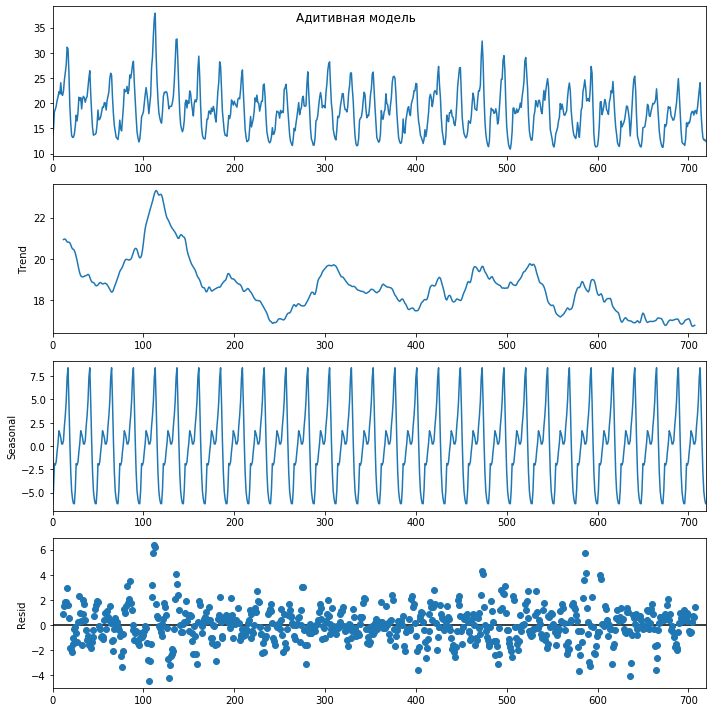

In [86]:
# Decompose 
result_A = seasonal_decompose(fit1.fittedvalues, model='additive', freq=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')


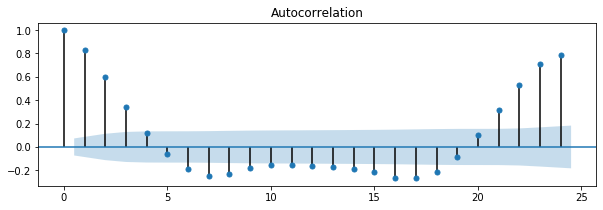

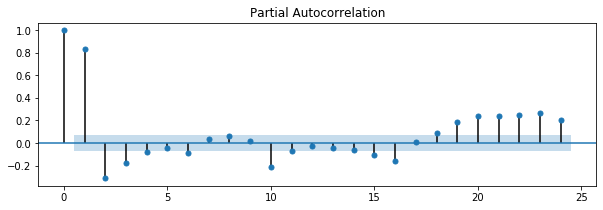

In [50]:
plt.rcParams.update({'figure.figsize': (10,3)})
plot_acf(train, lags=24)
plot_pacf(train, lags=24)
plt.show()

In [108]:
model = auto_arima(train, seasonal=True, m=24, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True,trend="t")
model

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,24) [intercept=True]; AIC=3147.134, BIC=3183.757, Time=20.493 seconds
Fit ARIMA(0,1,0)x(0,0,0,24) [intercept=True]; AIC=3411.603, BIC=3420.759, Time=0.359 seconds
Fit ARIMA(1,1,0)x(1,0,0,24) [intercept=True]; AIC=3219.315, BIC=3237.626, Time=10.605 seconds
Fit ARIMA(0,1,1)x(0,0,1,24) [intercept=True]; AIC=3305.862, BIC=3324.173, Time=8.421 seconds
Fit ARIMA(0,1,0)x(0,0,0,24) [intercept=False]; AIC=3411.603, BIC=3420.759, Time=0.246 seconds
Fit ARIMA(2,1,2)x(0,0,1,24) [intercept=True]; AIC=3244.414, BIC=3276.459, Time=32.228 seconds
Fit ARIMA(2,1,2)x(1,0,0,24) [intercept=True]; AIC=3186.514, BIC=3218.559, Time=20.383 seconds
Fit ARIMA(2,1,2)x(2,0,1,24) [intercept=True]; AIC=3010.106, BIC=3051.306, Time=159.721 seconds
Fit ARIMA(2,1,2)x(2,0,0,24) [intercept=True]; AIC=3078.682, BIC=3115.305, Time=111.347 seconds
Fit ARIMA(2,1,2)x(2,0,2,24) [intercept=True]; AIC=3137.258, BIC=3183.036, Time=63.150 seconds
Fit ARIMA(2,1,2)x

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 0, 1, 24),
      start_params=None, suppress_warnings=True, trend='t',
      with_intercept=True)

In [109]:
mod =  (train,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 1, 24))

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2940      0.056     -5.276      0.000      -0.403      -0.185
ar.L2          0.6057      0.042     14.587      0.000       0.524       0.687
ma.L1         -0.0396      0.110     -0.359      0.720      -0.256       0.177
ma.L2         -0.9601      0.034    -27.974      0.000      -1.027      -0.893
ar.S.L24       1.0471      0.040     26.022      0.000       0.968       1.126
ar.S.L48      -0.0543      0.039     -1.403      0.161      -0.130       0.022
ma.S.L24      -0.8704      0.033    -26.169      0.000      -0.936      -0.805
sigma2         3.1610      0.228     13.893      0.000       2.715       3.607


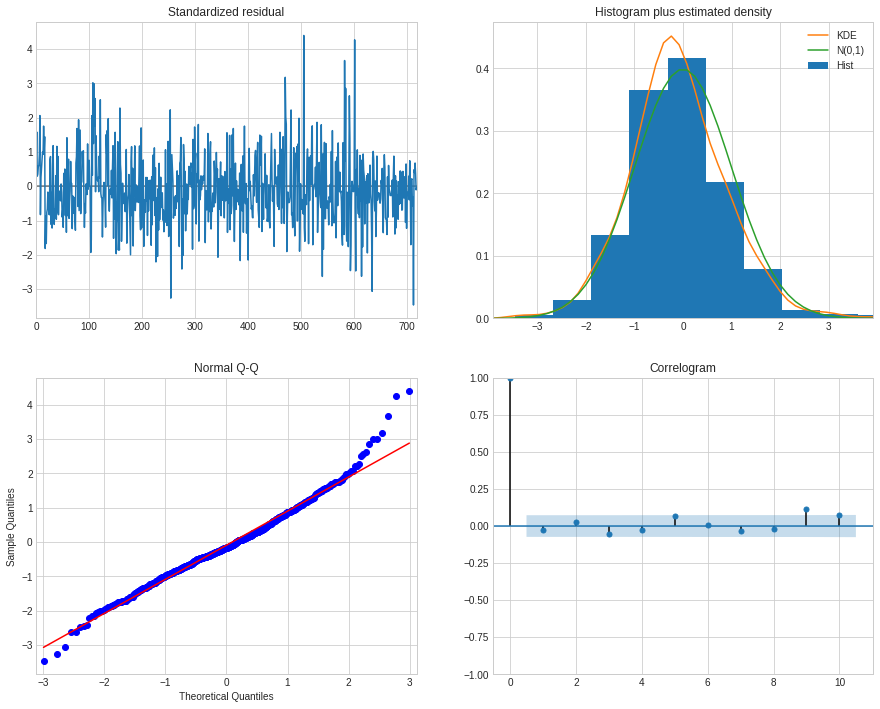

In [110]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [119]:
predict=results.get_prediction()
predict.predicted_mean[:900]

0       0.000000
1      13.175984
2      15.065509
3      18.365565
4      18.209583
5      18.383734
6      19.021025
7      19.644417
8      20.811954
9      24.046470
10     20.707066
11     20.824885
12     21.139951
13     22.179893
14     23.084962
15     23.931254
16     25.875887
17     26.105770
18     26.939972
19     21.484432
20     19.593448
21     16.358930
22     15.801283
23     14.813411
24     14.644843
25     15.849887
26     17.823372
27     17.144067
28     19.207093
29     20.946620
         ...    
690    21.918536
691    18.471328
692    14.992104
693    12.260800
694    12.440085
695    12.106508
696    11.780685
697    13.229449
698    17.042614
699    15.069671
700    16.482960
701    16.280931
702    17.101481
703    19.314444
704    18.437335
705    19.015394
706    17.662382
707    18.261226
708    18.556558
709    17.740195
710    19.508132
711    21.137082
712    23.960384
713    25.544895
714    17.817301
715    15.832626
716    14.276663
717    13.6630

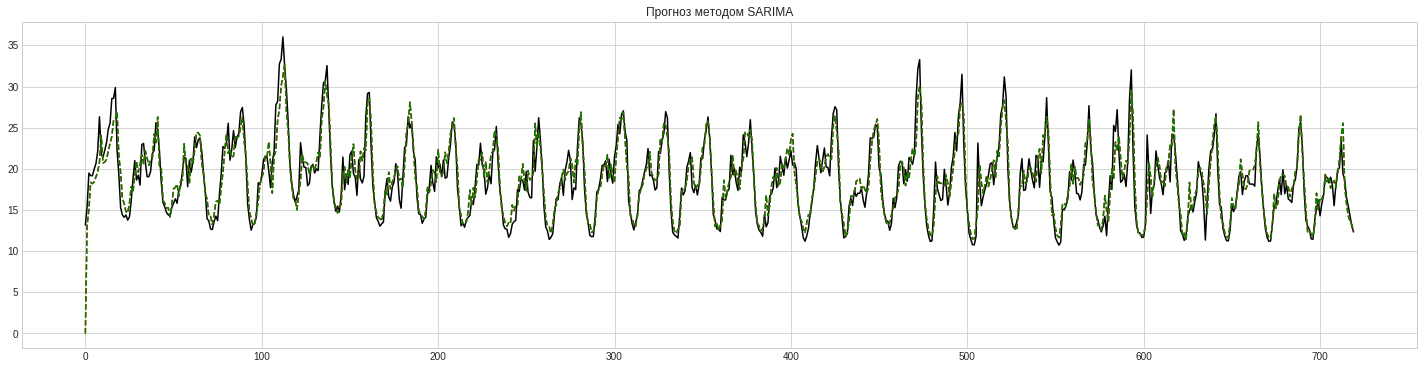

In [122]:

ax = df.y.plot(figsize=(25,6), color='black', title="Прогноз методом SARIMA" )
results.fittedvalues.plot(ax=ax, style='--', color='red')
predict.predicted_mean.plot(ax=ax, style='--', color='green')
plt.show()

In [121]:
metrics(test, predict.predicted_mean)

Тест на стационарность:
	T-статистика = -6.403
	P-значение = 0.000
Критические значения :
	1%: -3.439620010600208 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.8656309041017756 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.5689484851894413 - Данные  стационарны с вероятностью 90% процентов
MAD: 1.4277
MSE: 3.6216
MAPE: 0.0763
MPE: -0.0166
Стандартная ошибка: 1.903


In [29]:
#Монте-Карло
size = 720

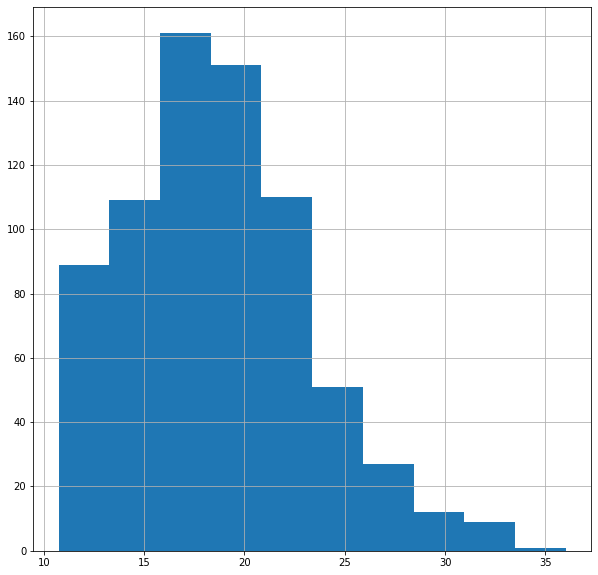

In [30]:
df['y'].hist()

In [31]:
df[['y']].describe()

,y
count,720.000000
mean,18.694600
std,4.498866
min,10.728000
25%,15.480000
50%,18.372000
75%,21.300000
max,36.024000


(array([ 37.,  64., 121., 134., 113.,  88.,  83.,  42.,  28.,  10.]),
 array([10.59197912, 13.10398901, 15.61599891, 18.1280088 , 20.6400187 ,
        23.15202859, 25.66403849, 28.17604838, 30.68805827, 33.20006817,
        35.71207806]),
 <a list of 10 Patch objects>)

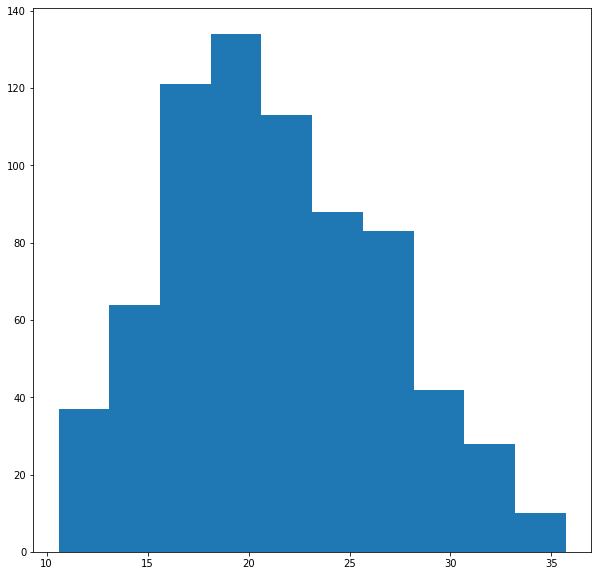

In [32]:
consumpt = np.random.triangular(left = 10, mode = 18, right = 36, size = size)
plt.hist(consumpt)

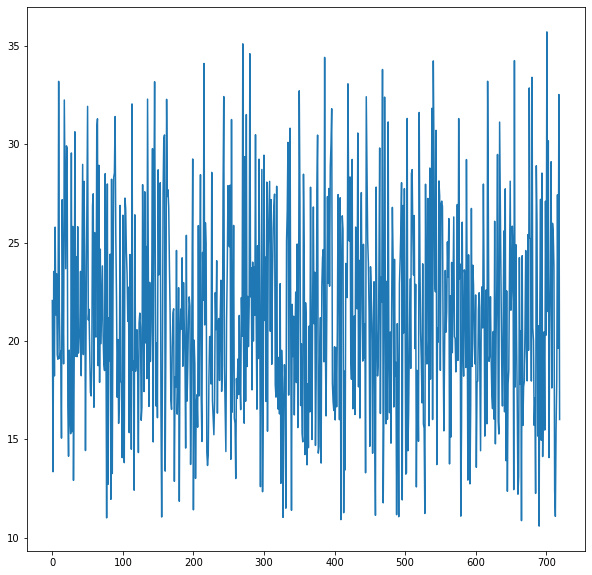

In [33]:
plt.plot(consumpt)